# Tobacco use vs. Monthly Premium 


In [1]:
# import library #

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# impoart rate.csv file #

rate = pd.read_csv("Rate.csv")

In [3]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
SourceName                                   object
VersionNum                                   int64
ImportDate                                   object
IssuerId2                                    int64
FederalTIN                                   object
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
Pr

#### There are total of 24 variables in the dataset. Among all the variables, this analysis primarily focuses on BusinessYear, StateCode, PlanId, RatingAreaId, Tobacco, IndividualRate and IndividualTobaccoRate.

In [4]:
rate.head(10)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
5,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.45,NaN,64.9,94.50,94.50,94.50,126.95,126.95,126.95,17
7,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
8,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
9,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.45,NaN,64.9,94.50,94.50,94.50,126.95,126.95,126.95,18


In [5]:
# Let's explore variables first #

states_count = len(rate["StateCode"].value_counts())
plans_count = len(rate["PlanId"].value_counts())

states_count, plans_count

(39, 16808)

#### There are 39 states and 16808 health insurance plans in the dataset.

In [6]:
# check the list of states presented in the dataset#
rate_states = rate['StateCode'].unique()
rate_states

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

In [7]:
# The following is a list of all 50 states and D.C #
all_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# let's check what states are missing #
print("Missing states in the dataset:", (set(all_states).difference(rate_states))) 

Missing states in the dataset: {'DC', 'CA', 'MA', 'WA', 'NY', 'MD', 'CT', 'KY', 'MN', 'CO', 'RI', 'VT'}


#### Note that this dataset does not include records for the following states: New York, Colorado, Vermont, Maryland, California, Massachusetts, Rhode Island, Kentucky, Washington, Minnesota, Connecticut and Washington, D.C.

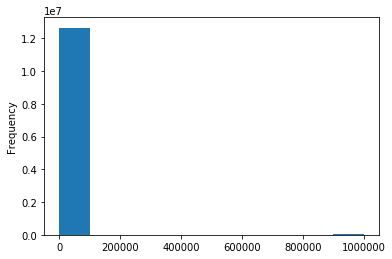

In [8]:
# check the distribution of IndividualRate #

rate['IndividualRate'].plot.hist()

In [9]:
rate['IndividualRate'].agg(['mean', 'std', 'min', 'max'])

mean      4098.026459
std      61222.712587
min          0.000000
max     999999.000000
Name: IndividualRate, dtype: float64

#### According to the histogram and summary statistics, the Individual Rate has a very weird distribution. There are lot of odd values for IndividualRate as well. For example, a monthly premium rate of 999999 dollars does not make sense. 

#### Before conducting the analysis, It is necessary to clean these odd values and set them to NaN.

In [10]:
# fix values for the IndividualRate and set 0, 0.01 and any value greate than 9999 to NaN #
na_values = ['NaN', 'N/A', '0', '0.01', '9999', '9999.99', '999999']

# For the convinence, we will only keep coloumns of BusinessYear, StateCode, PlanId, Tobacco, IndividualRate and IndividualTobaccoRate.#
clean_rate = pd.read_csv("Rate.csv", na_values=na_values, 
                         usecols=['BusinessYear', 'StateCode', 'PlanId', 'RatingAreaId',
                                  'Tobacco', 'IndividualRate','IndividualTobaccoRate'])


In [11]:
# drop rows with duplicate values #
final_rate = clean_rate.drop_duplicates().reset_index(drop=True)
final_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584753 entries, 0 to 7584752
Data columns (total 7 columns):
BusinessYear             int64
StateCode                object
PlanId                   object
RatingAreaId             object
Tobacco                  object
IndividualRate           float64
IndividualTobaccoRate    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 405.1+ MB


#### After the data cleaning, the dataset contains 7584753 obseravtions and 7 columns that we are insterested in.

In [12]:
# Let's look at the data by year #
final_rate["BusinessYear"].value_counts()

2015    2742324
2016    2481553
2014    2360876
Name: BusinessYear, dtype: int64

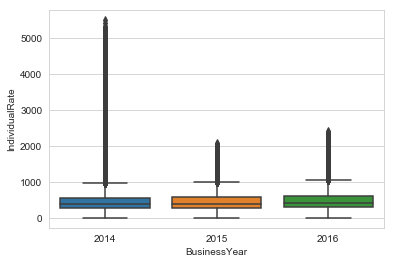

In [13]:
sns.set_style("whitegrid")
sns.boxplot(x="BusinessYear", y="IndividualRate", data=final_rate)

#### According to the boxplot, there are some outliers in 2014.

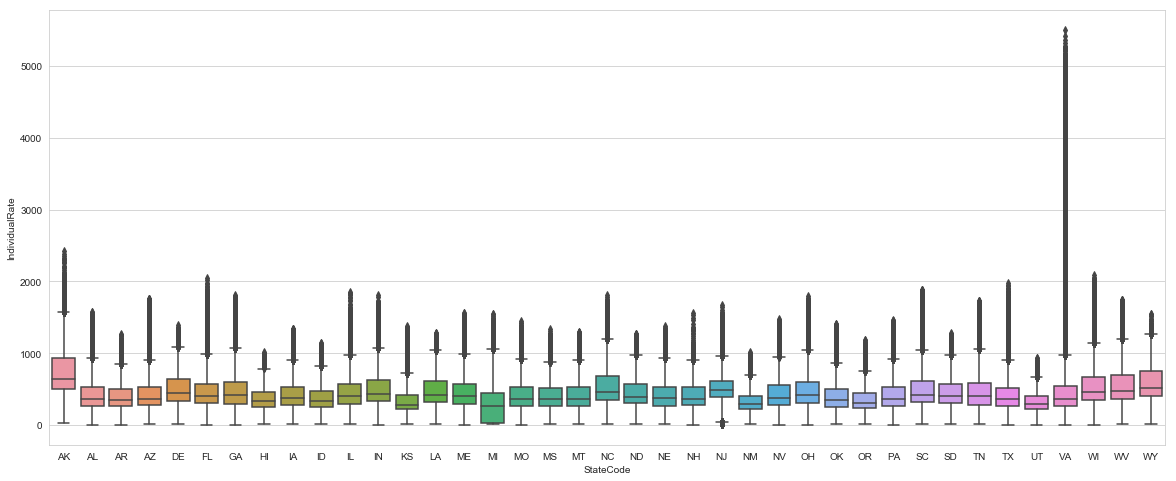

In [14]:
states = np.sort(final_rate['StateCode'].unique())
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=final_rate, order=states)

#### As we can see in the boxplot,  Virginia has some outliers which lead to the skewed distribution in 2014.

Text(0.5, 1.0, 'Individual Rate by State in 2014')

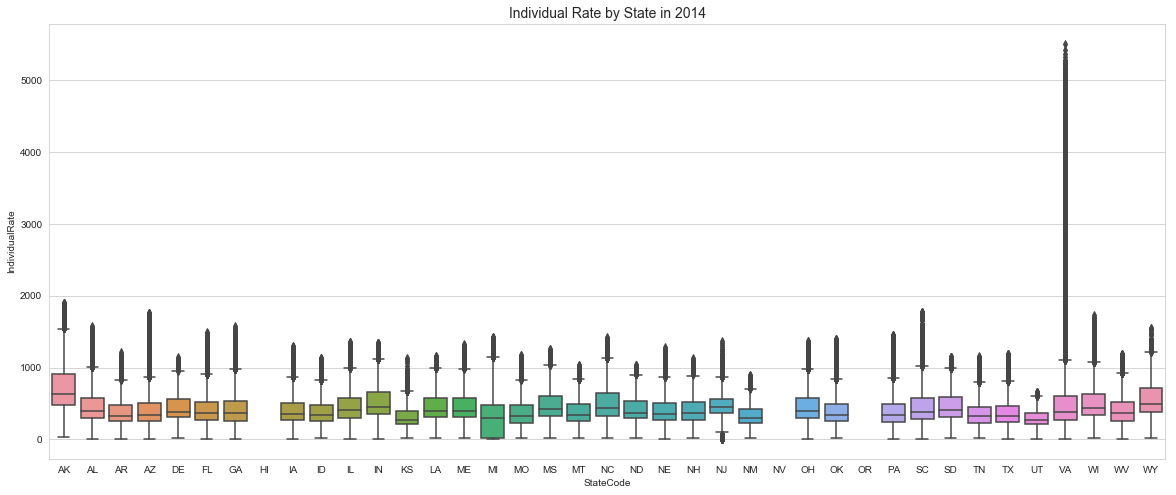

In [15]:
# Let's took at Virginia in 2014 more specificaly. #
rate2014 = final_rate[final_rate['BusinessYear'].isin([2014])].copy()
rate2015 = final_rate[final_rate['BusinessYear'].isin([2015])].copy()
rate2016 = final_rate[final_rate['BusinessYear'].isin([2016])].copy()

plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=rate2014, order=states).set_title("Individual Rate by State in 2014",fontsize=14)


#### As we can see, 2014 data for Hawaii, Nevada and Oregon are missing. Virginia has outliers in 2014.

In [16]:
# Let's look at individual rates of Virginia in 2014. #
va2014 = rate2014[rate2014['StateCode'].isin(['VA'])].copy()
va2014['IndividualRate'].describe()

count    69360.000000
mean       592.177118
std        680.301097
min         10.010000
25%        267.215000
50%        379.500000
75%        604.090000
max       5503.850000
Name: IndividualRate, dtype: float64

#### As we can see, the 2014 rates in Virginia is actually very spread out with a range between 10 dolloars and 5503 dollars. In this case, a rate of 5503 dolloars is the primary cause for the skewed distribution, leading to the average rate of 592 dolloars for Virginia in 2014.

In [17]:
# Let's look at individual rates of Virginia in 2015 and 2016. #
va2015 = rate2015[rate2015['StateCode'].isin(['VA'])].copy()
va2016 = rate2016[rate2016['StateCode'].isin(['VA'])].copy()
va2015['IndividualRate'].describe(),va2016['IndividualRate'].describe()

(count    55642.000000
 mean       411.863624
 std        216.940362
 min          1.500000
 25%        271.180000
 50%        360.820000
 75%        523.480000
 max       1579.860000
 Name: IndividualRate, dtype: float64, count    52523.000000
 mean       406.446833
 std        204.642313
 min          1.500000
 25%        272.940000
 50%        357.030000
 75%        520.180000
 max       1419.030000
 Name: IndividualRate, dtype: float64)

#### In 2015, the individual rates in Virginia has a range between 1.5 dolloars and 1579 dollars. In 2016, the individual rates in Virginia has a range between 1.5 dolloars and 1419 dollars.

In [18]:
#Let's compare individual rate and individual tobacco rate #
median2014 = rate2014[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
median2015 = rate2015[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
median2016 = rate2016[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)

mean2014 = rate2014[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
mean2015 = rate2015[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
mean2016 = rate2016[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)

std2014 = rate2014[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
std2015 = rate2015[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
std2016 = rate2016[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)

medians = pd.concat([median2014,median2015,median2016], keys=['2014', '2015', '2016'], axis=1)
means = pd.concat([mean2014,mean2015,mean2016], keys=['2014', '2015', '2016'], axis=1)
std = pd.concat([std2014,std2015,std2016], keys=['2014', '2015', '2016'], axis=1)


In [19]:
medians

,2014,2015,2016
IndividualRate,378.76,397.68,418.62
IndividualTobaccoRate,486.51,459.32,478.82


In [20]:
means

,2014,2015,2016
IndividualRate,426.483050,447.051731,468.176596
IndividualTobaccoRate,565.833261,530.468488,552.135843


In [21]:
std

,2014,2015,2016
IndividualRate,265.156579,248.311957,256.655695
IndividualTobaccoRate,329.806706,266.369962,265.993303


#### According to the above descriptive statistics, there are some variations between individual rate and individual tobacco rate. The difference is the largest in 2014. The standard deviation for both the individual rate and individual tobacco rate are very large from 2014 to 2016.

[Text(0, 0, 'Non-smokers'), Text(0, 0, 'Smokers')]

<Figure size 1080x720 with 0 Axes>

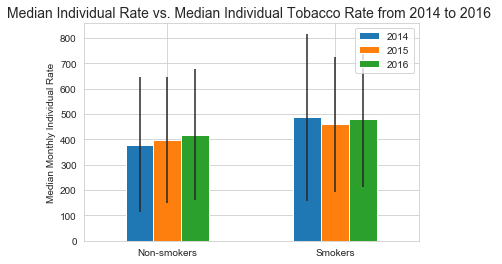

In [23]:
# compare median individual rate and median individual tobacco rate between 2014 and 2016 #
fig = plt.figure(figsize=(15, 10))

ax = medians.plot.bar(yerr=std, rot=0)
ax.set_ylabel("Median Monthly Individual Rate")
ax.set_title("Median Individual Rate vs. Median Individual Tobacco Rate from 2014 to 2016 ",fontsize=14)


labels = ['Non-smokers', 'Smokers']
xticks = [0,1]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(labels)


#### According to the barplot, the median rate for non-smokers shows an increasing trend from 2014 to 2016. In contrast, the median rate for smokers remains stable compared to rates for non-smokers.

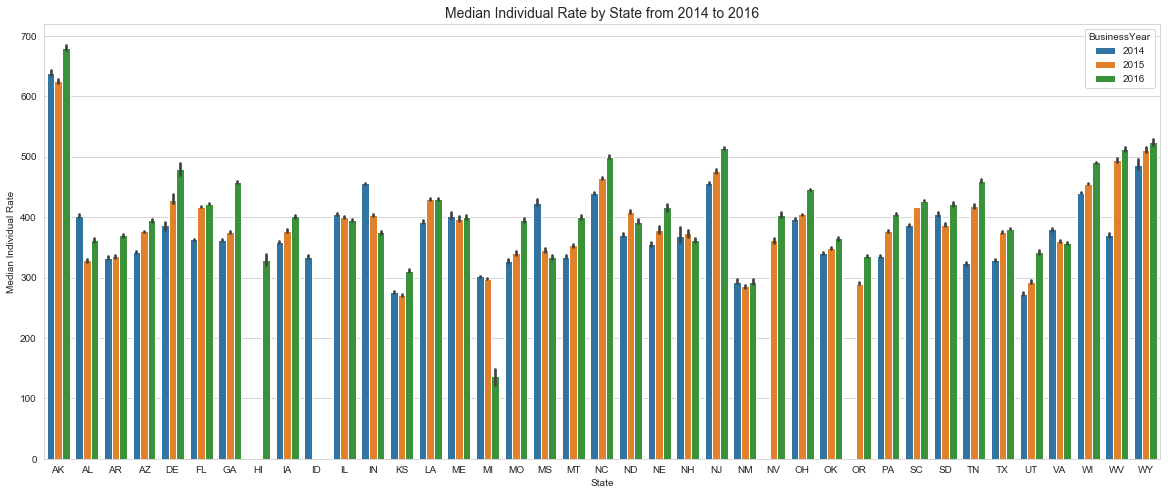

In [24]:
# compare the individual rates at state level from 2014 to 2016.#

allyears = pd.concat([rate2014,rate2015,rate2016])
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")
plot1=sns.barplot(x=allyears['StateCode'], y=allyears['IndividualRate'], hue=allyears['BusinessYear'], 
            order=states, estimator=np.median, ci=95, n_boot=100).set_title(
    "Median Individual Rate by State from 2014 to 2016",fontsize=14)
plt.xlabel("State")
plt.ylabel("Median Individual Rate")
plt.show(plot1)

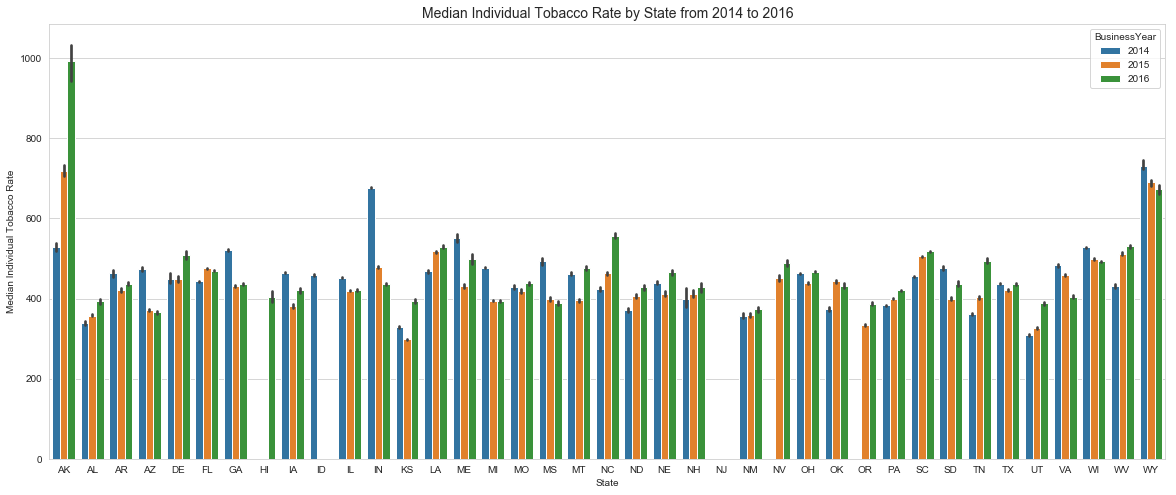

In [25]:
# compare the individual tobacco rates at state level from 2014 to 2016.#


plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")
plot2=sns.barplot(x=allyears['StateCode'], y=allyears['IndividualTobaccoRate'], hue=allyears['BusinessYear'], 
            order=states, estimator=np.median, ci=95, n_boot=100).set_title(
    "Median Individual Tobacco Rate by State from 2014 to 2016",fontsize=14)
plt.xlabel("State")
plt.ylabel("Median Individual Tobacco Rate")
plt.show(plot2)

#### As we can see, not all the states have records for individual rates or individual tobacco rates. We can compare and sort rates only for states which have records in the dataset.

In [26]:
# exclude states without records and compare the median individual rates between 2014 and 2016#
statelist1 = allyears['StateCode'].unique()
individual_medians = [] 
for state in statelist1:
    individual_medians.append(np.median(allyears[allyears['StateCode'].isin([state])].IndividualRate))
    
statelist_individual = np.column_stack((np.asarray(statelist1), individual_medians))
statelist_individual = statelist_individual[statelist_individual[:, 1].argsort()]

C:\Users\Cher Yuan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


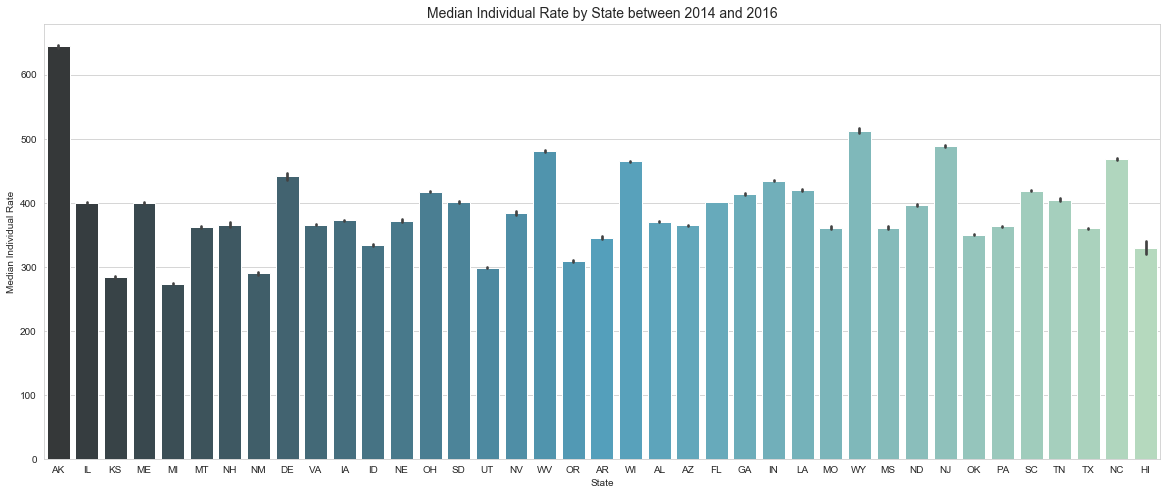

In [27]:
fig = plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")

plot3 = sns.barplot(x=allyears['StateCode'], y=allyears['IndividualRate'], order=statelist_individual[:,0],
                    estimator=np.median, ci=95, n_boot=100,palette="GnBu_d").set_title(
    "Median Individual Rate by State between 2014 and 2016",fontsize=14)
plt.xlabel("State")
plt.ylabel("Median Individual Rate")
plt.show(plot3)

#### As we can tell from the barplot, Alaska has the highest median individual rate between 2014 and 2016. On the other side, Kansas, Michigan and New Mexico rank the bottom 3 in terms of the median individual rate.

In [28]:
# exclude states without records and compare the median individual tobacco rates between 2014 and 2016#
statelist2 = allyears['StateCode'].unique()
statelist2

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

In [29]:
# want to delete "NJ" because it does not have any records for any year between 2014 and 2016 #
statelist2 = np.delete(statelist2, np.where(statelist2 == "NJ"))

In [30]:
statelist2

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL', 'KS',
       'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE', 'OH',
       'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

In [31]:
tobacco_medians = [] 
for state in statelist2:
    tobacco_medians.append(np.median(allyears[allyears['StateCode'].isin([state])].IndividualTobaccoRate))

statelist_tobacco = np.column_stack((np.asarray(statelist2), tobacco_medians))
statelist_tobacco = statelist_tobacco[statelist_tobacco[:, 1].argsort()]

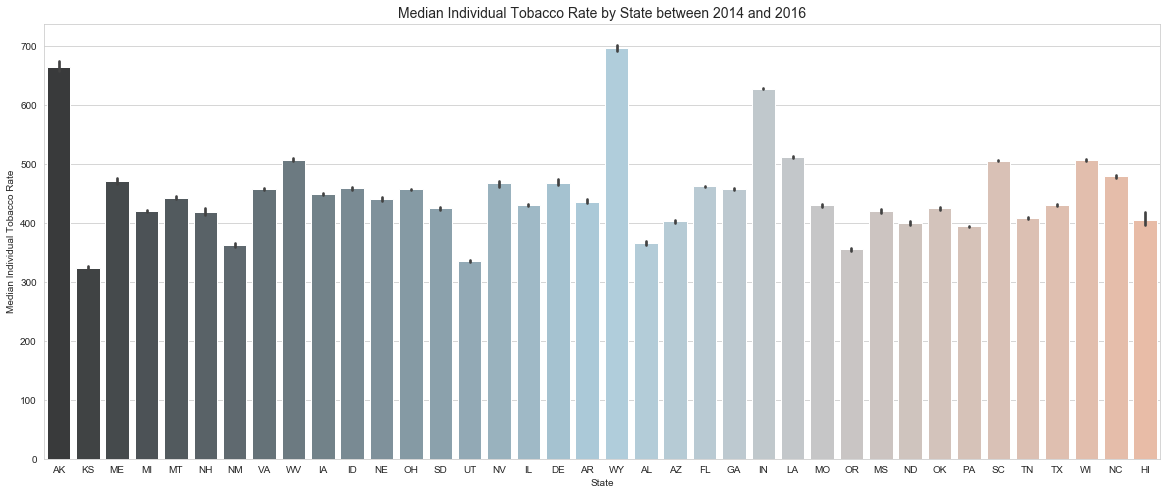

In [32]:
fig = plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")

plot4 = sns.barplot(x=allyears['StateCode'], y=allyears['IndividualTobaccoRate'], order=statelist_tobacco[:,0],
                    estimator=np.median, ci=95, n_boot=100,palette="RdBu_d").set_title(
    "Median Individual Tobacco Rate by State between 2014 and 2016",fontsize=14)
plt.xlabel("State")
plt.ylabel("Median Individual Tobacco Rate")
plt.show(plot4)

#### As we can tell from the barplot, Wyoming and Alaska has the highest median individual tobacco rates between 2014 and 2016. On the other side, Kansas, Utah and Oregon rank the bottom 3 in terms of the median individual tobacco rate.